שם התלמיד

............................

# Optional Lab: Linear Regression - one feature

במחברת זו תוכלו ליישם רגרסיה ליניארית עם משתנה אחד כדי לחזות תאונות דרכים כתלות בצריכת אלכוהול


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Linear regression with one variable ](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2  Dataset](#2.2)
  - [ 2.3 Refresher on linear regression](#2.3)
  - [ 2.4  Compute Cost](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 Gradient descent ](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Learning parameters using batch gradient descent ](#2.6)
  - [ 2.7 Model evaluation ](#2.7)


<a name="1"></a>
## 1 - Packages

ראשית,  נריץ את הקוד לייבא את כל החבילות שנזדקק להן במהלך במחברת זו.

- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- seaborn https://seaborn.pydata.org/generated/seaborn.load_dataset.html
 contains the data set


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

נניח שאתה או את מנכ"לים של חברת ביטוח
נניח שתרצו להעריך את התלות של צריכת האלכוהול והסכנה להיות מעורבים בתאונות דרכים

## 3 - Dataset

תתחילו בטעינת מערך הנתונים עבור משימה זו.
- `load_data()`
טוענת את הנתונים למשתנים `x_train` ו-`y_train`
   - `x_train` צריכת האלכוהול
   - `y_train` הסיכוי באחוזים להשתתף בתאונת דרכים קטלנית
   - גם `X_train` וגם `y_train` הם מערכים numpy.

In [ ]:
# load the dataset
df = sns.load_dataset('car_crashes')
print (df.columns)


Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')


#### Variables explanation


· total -> Number of drivers involved in fatal collisions per billion miles (5.900–23.900)

· speeding -> Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (1.792–9.450)

· alcohol -> Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (1.593–10.038)

· not_distracted -> Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted (1.760–23.661)

· no_previous -> Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (5.900–21.280)

· ins_premium -> Car Insurance Premiums (641.960–1301.520)

· ins_losses -> Losses incurred by insurance companies for collisions per insured driver (82.75–194.780)

· abbrev -> USA states

In [ ]:
x_train=df['alcohol'].to_numpy()
y_train=df['total'].to_numpy()

#### View the variables
לפני שמתחילים במשימה כלשהי, כדאי להכיר יותר את מערך הנתונים שלנו.
- מקום טוב להתחיל בו הוא פשוט להדפיס כל משתנה ולראות מה הוא מכיל.

הקוד שלהלן מדפיס את המשתנה `x_train` ואת סוג המשתנה.

הקוד שלהלן מדפיס את המשתנה `y_train` ואת סוג המשתנה.

In [ ]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [5.64  4.525 5.208 5.824 3.36 ]


In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [18.8 18.1 18.6 22.4 12. ]


#### Check the dimensions of your variables

דרך שימושית נוספת להכיר את הנתונים היא לראות את הממדים שלהם.

אנא הדפס את ה - shape של `x_train` ו-`y_train` וראה כמה דוגמאות אימון יש לך במערך הנתונים שלך.

In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (51,)
The shape of y_train is:  (51,)
Number of training examples (m): 51


#### Visualize your data

לעתים קרובות כדאי להבין את הנתונים על ידי ויזואליזציה שלהם.

עבור מערך נתונים זה, תרשים פיזור יוכל להמחיש את הנתונים, מכיוון שיש לו רק שני מאפיינים לצייר.
לבעיות רבות אחרות שתיתקל בהן בחיים האמיתיים יש יותר משני מאפיינים כאשר יש לך יותר משני מאפיינים, אתה עדיין יכול להשתמש בחלקת פיזור כדי לראות את הקשר בין כל זוג מאפיינים


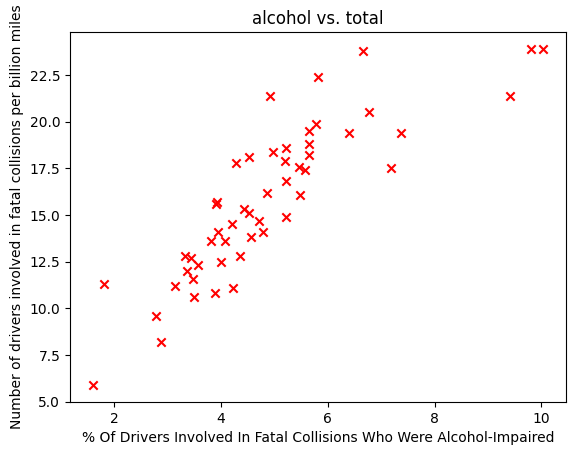

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("alcohol vs. total")
# Set the y-axis label
plt.ylabel('Number of drivers involved in fatal collisions per billion miles')
# Set the x-axis label
plt.xlabel('% Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired')
plt.show()

המטרה היא לבנות מודל רגרסיה ליניארי שיתאים לנתונים הללו.

עם מודל זה, ניתן להזין את אחוז הנהגים המעורבים בהתנגשויות קטלניות עם פגיעה באלכוהול ולהעריך את מספר הנהגים המעורבים בהתנגשויות קטלניות למיליארד מייל

<a name="4"></a>
## 4 - Refresher on linear regression

You will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` to `y` is represented as
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**.
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ and output a prediction $f_{w,b}(x)$.

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction, as opposed to $y^{(i)}$, which is the actual value in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [ ]:
# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model
        y (ndarray): Shape (m,) Label
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # You need to return this variable correctly
    total_cost = 0

    ### START CODE HERE ###

    ### END CODE HERE ###

    return total_cost

Test:

For initial_w = 2, initial_b = 1

**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w:<b> 29.718 </td>
  </tr>
</table>

In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 29.718


<a name="6"></a>
## 6 - Gradient descent

In this section, you will implement the gradient for parameters $w, b$ for linear regression.

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The gradient for the parameters $w, b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  2 * (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  2* (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [ ]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model
      y (ndarray): Shape (m,) Label
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]

    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0

    ### START CODE HERE ###


    ### END CODE HERE ###

    return dj_dw, dj_db

Test your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

For initial_w = 0, initial_b = 0

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -166.24223529411765 -31.58039215686274</td>
  </tr>
</table>

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

#compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -166.24223529411765 -31.58039215686274


In [ ]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -153.56274715294117 -29.22567843137255


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -153.56274715294117 -29.22567843137255</td>
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost    58.98   
Iteration  150: Cost     6.17   
Iteration  300: Cost     5.41   
Iteration  450: Cost     5.00   
Iteration  600: Cost     4.79   
Iteration  750: Cost     4.68   
Iteration  900: Cost     4.62   
Iteration 1050: Cost     4.58   
Iteration 1200: Cost     4.57   
Iteration 1350: Cost     4.56   
w,b found by gradient descent: 2.0730066309304966 5.636443019779181


**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 2.0730066309304966 5.636443019779181</td>
  </tr>
</table>

We will now use the final parameters from gradient descent to plot the linear fit.

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$.

To calculate the predictions shown in the code block below.

In [ ]:
m = x_train.shape[0]
y_predicted = np.zeros(m)
y_predicted = w * x_train + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

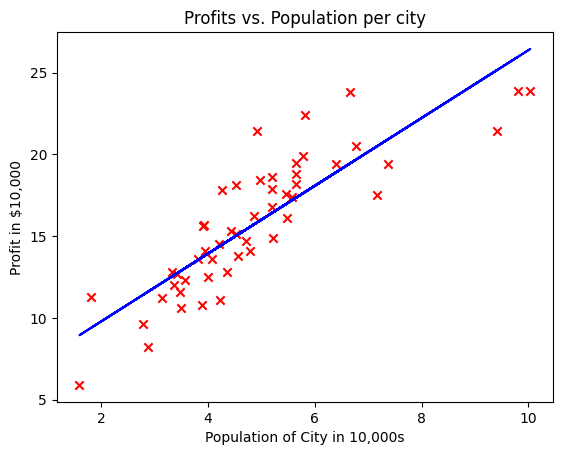

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Let's predict what will be the number of drivers involved in fatal collisions per billion miles if:

1- the percentage of drivers involved in fatal collisions with alcohol impairment is 1

2- the percentage of drivers involved in fatal collisions with alcohol impairment is 14

In [ ]:
predict1 = 1 * w + b
print('For x = 1, we predict y is %.2f' % predict1)

predict2 = 14 * w + b
print('For x = 14, we predict y is %.2f' % predict2)

For x = 1, we predict y is 7.71
For x = 14, we predict y is 34.66


**Expected Output**:
<table>
  <tr>
    <td> <b> For x = 1, we predict y is:<b></td>
    <td> 7.71 </td>
  </tr>
  
  <tr>
    <td> <b> For x = 14, we predict y is:<b></td>
    <td> 34.66 </td>
  </tr>
</table>

<a name="2.7"></a>
### 2.7 Model evaluation
## **Exercise 3**

In simpler terms, R-Squared tells us the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R-Squared of 100% indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s).

Mathematical Formulation of R-Squared
R-Squared is defined as the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Mathematically, it can be calculated as:

    R² = 1 - (SSR/SST)


Where:

SSR (Sum of Squared Residuals) is the sum of the squares of the residuals. The residuals are the difference between the actual values of the dependent variable and the predicted values from the regression model.

$$SSR = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

SST (Total Sum of Squares) is the total sum of squares, which is the sum of the differences between the actual values of the dependent variable and the mean value of the dependent variable, all squared

$$SST = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - ymean)^2$$

The value of R² lies between 0 and 1. A value of 1 means the model perfectly predicts the dependent variable using the independent variable(s). A value of 0 means the model cannot predict the dependent variable at all using the independent variable(s).

In [ ]:
def r_squared(y_true, y_pred):
    ### START CODE HERE ###


    ### END CODE HERE ###
    return r2

Lets evaluate R^2

In [ ]:
# Calculate R-squared
r2_score = r_squared(y_train, y_predicted)
print(r2_score)

0.7266277377629231


Credit to: Coursera-Supervised Machine Learning: Regression and Classification

Modified by: Merav Varsano Maala